In [1]:
import yfinance as yf
#from pandas_datareader import data
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import HourLocator, MonthLocator, YearLocator
import matplotlib.dates as mdates

In [2]:
tickers = ['^HSI', '^N225', '^GDAXI','^DJI', '^IXIC' ]
start_date = '2014-12-22'
start_dateCOVID = '2019-12-12'
end_date = '2021-01-15'

#Pull data
df_ticker = []
for k,ticker in enumerate(tickers):
    #df = data.DataReader(ticker, 'yahoo', start_date, end_date)
    df = yf.Ticker(ticker).history(period="max")
    nomalizeValue = df.loc[start_date].Close
    df['relClose'] = df['Close']/nomalizeValue*100
    nomalizeValueCOVID = df.loc[start_dateCOVID].Close
    df['relCloseCOVID'] = df['Close']/nomalizeValueCOVID*100
    df_ticker.append(df)

0 ^HSI
1 ^N225
2 ^GDAXI
3 ^DJI
4 ^IXIC


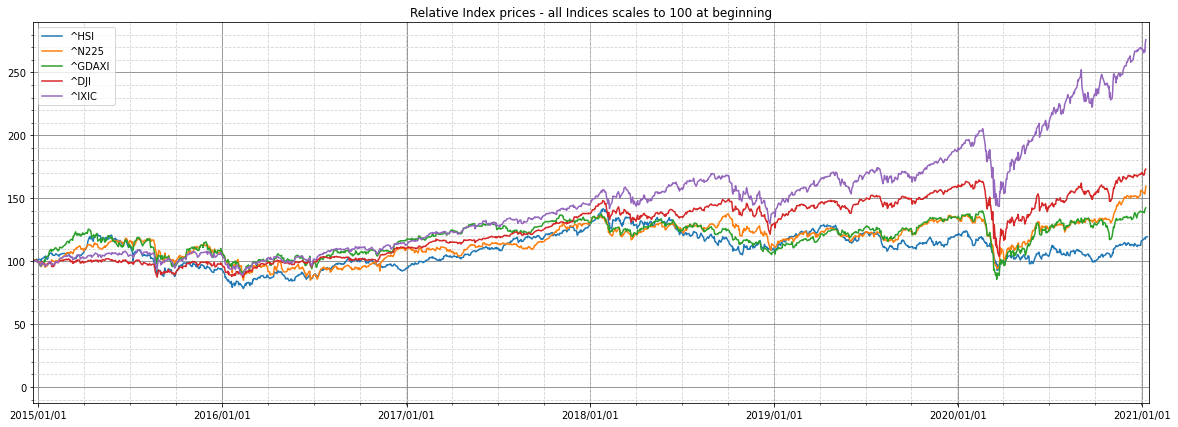

In [3]:
#OLNY NECESSARY TO SHOW FIGURES IN GITHUB - CAN BE REMOVED OTHERWISE
#import plotly.io as pio
#pio.renderers.default = "svg"

fig, axs = plt.subplots(1,figsize=(20,7))

for k,ticker in enumerate(tickers):
    print(k, ticker)
    df = df_ticker[k]
    axs.plot(df.index,df['relClose'],label=ticker)
    
axs.grid(b=True, which='major', color='grey', linestyle='-')
axs.minorticks_on()
axs.grid(b=True, which='minor', color='lightgrey', linestyle='--')
axs.set_xlim([start_date, end_date])
axs.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m/%d"))
plt.title("Relative Index prices - all Indices scales to 100 at beginning")
axs.legend();

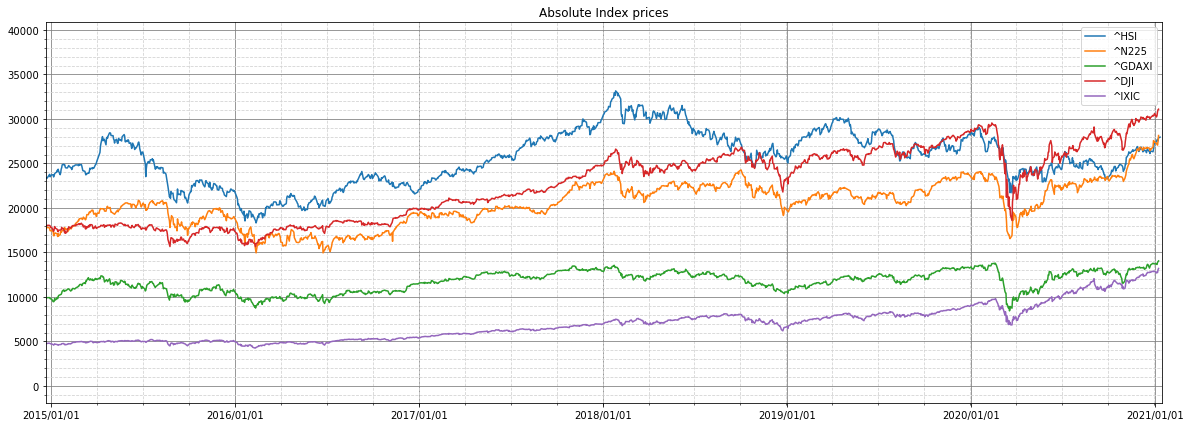

In [4]:
fig, axs = plt.subplots(1,figsize=(20,7))
for k,ticker in enumerate(tickers):
    df = df_ticker[k]
    axs.plot(df.index,df['Close'],label=ticker)
    
axs.grid(b=True, which='major', color='grey', linestyle='-')
axs.minorticks_on()
axs.grid(b=True, which='minor', color='lightgrey', linestyle='--')
axs.set_xlim([start_date, end_date])
axs.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m/%d"))
plt.title("Absolute Index prices")
axs.legend();

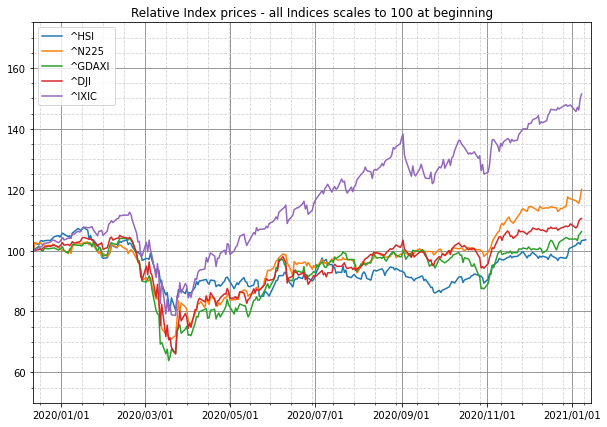

In [7]:
fig, axs = plt.subplots(1,figsize=(10,7))

for k,ticker in enumerate(tickers):
    df = df_ticker[k]
    axs.plot(df.index,df['relCloseCOVID'],label=ticker)
    
axs.grid(b=True, which='major', color='grey', linestyle='-')
axs.minorticks_on()
axs.grid(b=True, which='minor', color='lightgrey', linestyle='--')
axs.set_xlim([start_dateCOVID, end_date])
axs.set_ylim([50, 175])
axs.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m/%d"))
plt.title("Relative Index prices - all Indices scales to 100 at beginning")
axs.legend();